## Part 1

1) For both Smith-Waterman and Needleman-Wunsch algorithms:
    a) What are the parameters and variables required for algorithm initialization, execution, and termination?
    b) What quantities are returned?
    c) What is the runtime complexity?
    
    Smith-Waterman:
        a) Parameters:
            Initialization:
                a) seq1: First protein sequence
                b) seq2: Second protein sequence
                c) smat: scoring matrix
            Execution:
                a) scores: matrix of size M x N that records scores of optimal alignment
                b) traceback: matrix of size M x N that records previous cell from which each cell was computed from
            Termination:
                a) result: optimal alignment string
        b) Returns: Optimal sub-alignment with positive scores
        c) Complexity: O(MxN)

    Needleman-Wunsch:
        a) Parameters:
            Initialization:
                a) seq1: First protein sequence
                b) seq2: Second protein sequence
                c) smat: scoring matrix
            Execution:
                a) scores: matrix of size M x N that records scores of optimal alignment
                b) traceback: matrix of size M x N that records previous cell from which each cell was computed from
            Termination:
                a) result: optimal alignment string
        b) Returns: Full alignment string of sequence 
        c) Complexity: O(MxN)

2) What functionalities in initialization, execution and termination are shared between these algorithms? Which are not shared?

    Initialization: Both methods initialize and M x N matrix where M is the length of seq1 and N is the length of seq2. However, in initializing the SW matrix, you set the first row and first column to 0. 
    
    Execution: Both methods share methods for calculating the score at a particular cell in the matrix. This entails taking the max of the three following scores:
        a) Gap from left to right
        b) Gap from top to bottom
        c) Match
    However, SW adds an extra option where you can reset to 0 if the score goes negative.
    
    Termination: Both methods have to use the traceback matrix to return an alignment. NW must start at the lower rightmost cell and trace back all the way to the start and return that string. SW needs to start at the max element in the matrix and trace back until a 0 is reached, then return the resulting string.

3) How does affine-gap based alignment differ from linear-gap alignment in terms of implementation?
    
    Affine gap alignment requires you to keep track of the gap status of the previous cell when computing the score of the current cell (gap start, match/mismatch, gap extension). To return the optimal alignment you need two extra score matrices, one for seq1 and one for seq2, which keep track of the max score of either opening or extending a gap at the current cell. For the final traceback you would need to interface between the original score matrix and these two extra matrices to get the alignment.

In [ ]:
f = open("./sequences/prot-0088.fa",'r').read()
print(f)

In [ ]:
sw = SmithWaterman("/Users/mtsui1/Documents/Classes/Algs/Project1/scoring_matrices/BLOSUM50.mat")
scores, alignment = sw.align("./sequences/test1.fa", "./sequences/test2.fa")
print(scores)
print(alignment)

## Part 2

In [13]:
from align.algs import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import json

In [4]:
# read Pospairs and negpairs into a list

f = open("./scoring_matrices/Pospairs.txt",'r')
lines = f.readlines() # skip header
pos_pairs = []
for line in lines:
    line = line.strip()
    line = [i for i in line.split(" ") if i != ""]
    pos_pairs.append(line)
    
f = open("./scoring_matrices/Negpairs.txt",'r')
lines = f.readlines() # skip header
neg_pairs = []
for line in lines:
    line = line.strip()
    line = [i for i in line.split(" ") if i != ""]
    neg_pairs.append(line)

In [63]:
sw = SmithWaterman("/Users/mtsui1/Documents/Classes/Algs/Project1/scoring_matrices/BLOSUM50.mat")
sw.set_gap_open(-11)
sw.set_gap_extend(-3)

In [64]:
pos_scores = {}
for pair in pos_pairs:
    print(pair)
    score = sw.align(pair[0], pair[1], return_alignment=False)

    pos_scores[(pair[0], pair[1])] = score

['sequences/prot-0004.fa', 'sequences/prot-0008.fa']
['sequences/prot-0031.fa', 'sequences/prot-0034.fa']
['sequences/prot-0047.fa', 'sequences/prot-0050.fa']
['sequences/prot-0065.fa', 'sequences/prot-0069.fa']
['sequences/prot-0077.fa', 'sequences/prot-0082.fa']
['sequences/prot-0098.fa', 'sequences/prot-0102.fa']
['sequences/prot-0124.fa', 'sequences/prot-0125.fa']
['sequences/prot-0166.fa', 'sequences/prot-0177.fa']
['sequences/prot-0170.fa', 'sequences/prot-0173.fa']
['sequences/prot-0175.fa', 'sequences/prot-0178.fa']
['sequences/prot-0187.fa', 'sequences/prot-0190.fa']
['sequences/prot-0240.fa', 'sequences/prot-0242.fa']
['sequences/prot-0271.fa', 'sequences/prot-0275.fa']
['sequences/prot-0298.fa', 'sequences/prot-0300.fa']
['sequences/prot-0326.fa', 'sequences/prot-0327.fa']
['sequences/prot-0354.fa', 'sequences/prot-0355.fa']
['sequences/prot-0357.fa', 'sequences/prot-0360.fa']
['sequences/prot-0361.fa', 'sequences/prot-0364.fa']
['sequences/prot-0369.fa', 'sequences/prot-037

In [ ]:
pos_scores

In [65]:
neg_scores = {}
for pair in neg_pairs:
    print(pair)
    score = sw.align(pair[0], pair[1], return_alignment=False)

    neg_scores[(pair[0], pair[1])] = score

['sequences/prot-0018.fa', 'sequences/prot-0198.fa']
['sequences/prot-0035.fa', 'sequences/prot-0071.fa']
['sequences/prot-0056.fa', 'sequences/prot-0826.fa']
['sequences/prot-0075.fa', 'sequences/prot-0561.fa']
['sequences/prot-0093.fa', 'sequences/prot-0091.fa']
['sequences/prot-0110.fa', 'sequences/prot-0613.fa']
['sequences/prot-0131.fa', 'sequences/prot-0547.fa']
['sequences/prot-0148.fa', 'sequences/prot-0369.fa']
['sequences/prot-0166.fa', 'sequences/prot-0839.fa']
['sequences/prot-0186.fa', 'sequences/prot-0014.fa']
['sequences/prot-0206.fa', 'sequences/prot-0313.fa']
['sequences/prot-0228.fa', 'sequences/prot-0121.fa']
['sequences/prot-0244.fa', 'sequences/prot-0817.fa']
['sequences/prot-0262.fa', 'sequences/prot-0540.fa']
['sequences/prot-0286.fa', 'sequences/prot-0641.fa']
['sequences/prot-0305.fa', 'sequences/prot-0785.fa']
['sequences/prot-0326.fa', 'sequences/prot-0712.fa']
['sequences/prot-0346.fa', 'sequences/prot-0063.fa']
['sequences/prot-0363.fa', 'sequences/prot-034

In [ ]:
neg_scores

In [66]:
p_scores = list(pos_scores.values())

n_scores = list(neg_scores.values())

all_scores = p_scores + n_scores
print(all_scores)

[42.0, 49.0, 37.0, 79.0, 69.0, 34.0, 50.0, 31.0, 31.0, 34.0, 32.0, 36.0, 53.0, 41.0, 120.0, 32.0, 33.0, 50.0, 49.0, 57.0, 51.0, 42.0, 44.0, 44.0, 106.0, 36.0, 57.0, 54.0, 36.0, 37.0, 52.0, 42.0, 50.0, 48.0, 39.0, 46.0, 42.0, 40.0, 37.0, 32.0, 33.0, 33.0, 41.0, 67.0, 140.0, 41.0, 47.0, 358.0, 76.0, 44.0, 38.0, 28.0, 25.0, 32.0, 40.0, 41.0, 45.0, 20.0, 24.0, 20.0, 44.0, 19.0, 24.0, 40.0, 60.0, 34.0, 30.0, 40.0, 36.0, 35.0, 54.0, 34.0, 31.0, 50.0, 45.0, 27.0, 43.0, 31.0, 33.0, 35.0, 57.0, 40.0, 33.0, 51.0, 28.0, 52.0, 32.0, 34.0, 30.0, 30.0, 24.0, 29.0, 33.0, 40.0, 43.0, 34.0, 30.0, 22.0, 39.0, 31.0]


Text(0.5, 1.0, 'Distribution of aligment scores')

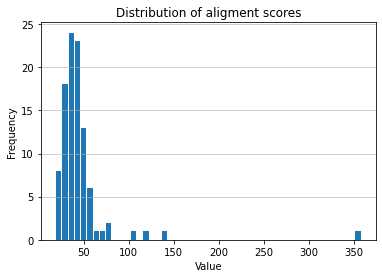

In [39]:
plt.hist(x=all_scores, bins='auto', rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of aligment scores')

The distribution is centered around scores from ~25-50, meaning that most alignments are falling into this score range. There are some higher scoring outliers as well.

In [67]:

avg_score = np.mean(all_scores)
print("Average score (threshold): " + str(avg_score))

# predict that the scores higher than threshold are True
predicted = all_scores > avg_score

# First 50 scores are true positive, last 50 are true negative
actual = list(np.repeat(True, 50))  + list(np.repeat(False, 50))

df = pd.DataFrame({'predicted': predicted, 'actual': actual})


Average score (threshold): 45.44


In [41]:
confusion_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
False,44,6
True,28,22


In [42]:
#The sensitivity is TP/TP+FN
sensitivity = 22/(22+28)
print("sensitivity: " + str(sensitivity))

# specificity = TN/TN+FP
specificity = 44/(44+6)
print("specificity: " + str(specificity))

sensitivity: 0.44
specificity: 0.88


Using the average score to threshold seems to give a low sensitivity but high specificity. I notice that there are lots of false negatives. 

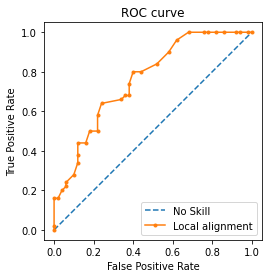

In [68]:
#pred = [x/max(all_scores) for x in all_scores]

fpr, tpr, thresholds = roc_curve(df['actual'], all_scores)
ns_probs = [False for _ in range(len(df['actual']))]
ns_fpr, ns_tpr, _ = roc_curve(df['actual'], ns_probs)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Local alignment')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.set_aspect('equal', adjustable='box')
plt.legend()

In [55]:
# calculate AUC
auc = roc_auc_score(df['actual'], pred)
print("AUC: " + str(auc))

AUC: 0.76


From the AUC, using the average score as a threshold, you can see that algorithm performs at least better than the random line (AUC 0.5). However, you cannot determine the performance using just one threshold. You need to try many different thresholds to find the one that maximizes the AUC.

In [ ]:
sw = SmithWaterman("/Users/mtsui1/Documents/Classes/Algs/Project1/scoring_matrices/BLOSUM62.mat")

In [ ]:
pos_scores_gaps = {}

for gap_open in range(1,21):
    sw.set_gap_open(-gap_open)
    for gap_extend in range(1,6):
        scores = []
        sw.set_gap_extend(-gap_extend)
        for pair in pos_pairs:
            score = sw.align(pair[0], pair[1], return_alignment=False)
            scores.append(score)
        pos_scores_gaps[(gap_open, gap_extend)] = scores
        print(gap_open, gap_extend)


In [ ]:
new = {}
for k,v in pos_scores_gaps.items():
    new[str(k)] = v
    

In [ ]:
with open('./pos_scores_gaps.json', 'w') as f:
    json.dump(new, f)

In [58]:
import json

with open('./pos_scores_gaps.json') as f:
    pos_scores_gaps = json.load(f)
    
with open('./neg_scores_gaps.json') as f:
    neg_scores_gaps = json.load(f)

In [ ]:
neg_scores_gaps = {}

for gap_open in range(1,21):
    sw.set_gap_open(-gap_open)
    for gap_extend in range(1,6):
        scores = []
        sw.set_gap_extend(-gap_extend)
        for pair in neg_pairs:
            score = sw.align(pair[0], pair[1], return_alignment=False)
            scores.append(score)
        neg_scores_gaps[str((gap_open, gap_extend))] = scores
        print(gap_open, gap_extend)


In [ ]:
len(neg_scores_gaps)

In [ ]:
with open('./neg_scores_gaps.json', 'w') as f:
    json.dump(neg_scores_gaps, f)

In [61]:
import pandas as pd

aucs = {}

# First 50 scores are true positive, last 50 are true negative
actual = list(np.repeat(True, 50))  + list(np.repeat(False, 50))

for k,v in pos_scores_gaps.items():
    all_scores = pos_scores_gaps[k] + neg_scores_gaps[k]
    #pred = [x/max(all_scores) for x in all_scores]
    #avg_score = np.mean(all_scores)
    #pred_scores = all_scores > avg_score
    auc = roc_auc_score(actual, all_scores)
    aucs[k] = auc



In [62]:
maximum = max(aucs, key=aucs.get)  # Just use 'min' instead of 'max' for minimum.
print(maximum, aucs[maximum])
# D 87

(2, 3) 0.8432


In [17]:
nw = NeedlemanWunsch("./scoring_matrices/BLOSUM50.mat")
nw.set_gap_open(-2)
nw.set_gap_extend(-3)

In [20]:
pos_scores_BLOSUM50 = []
for pair in pos_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_BLOSUM50.append(score)
    
neg_scores_BLOSUM50 = []
for pair in neg_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    neg_scores_BLOSUM50.append(score)

In [21]:
nw.set_score_mat("./scoring_matrices/BLOSUM62.mat")
pos_scores_BLOSUM62 = []
for pair in pos_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_BLOSUM62.append(score)
    
neg_scores_BLOSUM62 = []
for pair in neg_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    neg_scores_BLOSUM62.append(score)

In [22]:
nw.set_score_mat("./scoring_matrices/PAM100.mat")
pos_scores_PAM100 = []
for pair in pos_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_PAM100.append(score)
    
neg_scores_PAM100 = []
for pair in neg_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    neg_scores_PAM100.append(score)

In [23]:
nw.set_score_mat("./scoring_matrices/PAM250.mat")
pos_scores_PAM250 = []
for pair in pos_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_PAM250.append(score)
    
neg_scores_PAM250 = []
for pair in neg_pairs:
    score = nw.align(pair[0], pair[1], return_alignment=False)
    neg_scores_PAM250.append(score)

In [70]:
sw = SmithWaterman("./scoring_matrices/BLOSUM50.mat")
sw.set_gap_open(-2)
sw.set_gap_extend(-3)

In [71]:
pos_scores_BLOSUM50_sw = []
for pair in pos_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_BLOSUM50_sw.append(score)
    
neg_scores_BLOSUM50_sw = []
for pair in neg_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    neg_scores_BLOSUM50_sw.append(score)

In [75]:
sw.set_score_mat("./scoring_matrices/BLOSUM62.mat")
pos_scores_BLOSUM62_sw = []
for pair in pos_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_BLOSUM62_sw.append(score)
    
neg_scores_BLOSUM62_sw = []
for pair in neg_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_BLOSUM62_sw.append(score)

In [77]:
sw.set_score_mat("./scoring_matrices/PAM100.mat")
pos_scores_PAM100_sw = []
for pair in pos_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_PAM100_sw.append(score)
    
neg_scores_PAM100_sw = []
for pair in neg_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_PAM100_sw.append(score)

In [78]:
sw.set_score_mat("./scoring_matrices/PAM250.mat")
pos_scores_PAM250_sw = []
for pair in pos_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_PAM250_sw.append(score)
    
neg_scores_PAM250_sw = []
for pair in neg_pairs:
    score = sw.align(pair[0], pair[1], return_alignment=False)
    pos_scores_PAM250_sw.append(score)

In [80]:
nw_dict = {
    'nw_all_blosum50':pos_scores_BLOSUM50 + neg_scores_BLOSUM50,
    'nw_all_blosum62':pos_scores_BLOSUM62 + neg_scores_BLOSUM62,
    'nw_all_pam100':pos_scores_PAM100 + neg_scores_PAM100,
    'nw_all_pam250':pos_scores_PAM250 + neg_scores_PAM250,
}


In [81]:
sw_dict = {
    'sw_all_blosum50':pos_scores_BLOSUM50_sw + neg_scores_BLOSUM50_sw,
    'sw_all_blosum62':pos_scores_BLOSUM62_sw + neg_scores_BLOSUM62_sw,
    'sw_all_pam100':pos_scores_PAM100_sw + neg_scores_PAM100_sw,
    'sw_all_pam250':pos_scores_PAM250_sw + neg_scores_PAM250_sw,
}

In [85]:
# First 50 scores are true positive, last 50 are true negative
actual = list(np.repeat(True, 50))  + list(np.repeat(False, 50))
result_table = pd.DataFrame(columns=['score_mat', 'fpr','tpr','auc'])

for k,v in sw_dict.items():  
    fpr, tpr, _ = roc_curve(actual,  v)
    auc = roc_auc_score(actual, v)
    
    result_table = result_table.append({'score_mat':k,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('score_mat', inplace=True)
result_table

,fpr,tpr,auc
score_mat,,,
sw_all_blosum50,"[0.0, 0.0, 0.0, 0.02, 0.02, 0.04, 0.04, 0.06, ...","[0.0, 0.02, 0.2, 0.2, 0.3, 0.3, 0.32, 0.34, 0....",0.8078
sw_all_blosum62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.0...","[0.0, 0.02, 0.14, 0.22, 0.26, 0.3, 0.32, 0.4, ...",0.8432
sw_all_pam100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.06...","[0.0, 0.02, 0.16, 0.2, 0.24, 0.28, 0.3, 0.42, ...",0.8408
sw_all_pam250,"[0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.04, 0...","[0.0, 0.02, 0.06, 0.18, 0.18, 0.2, 0.24, 0.26,...",0.7898


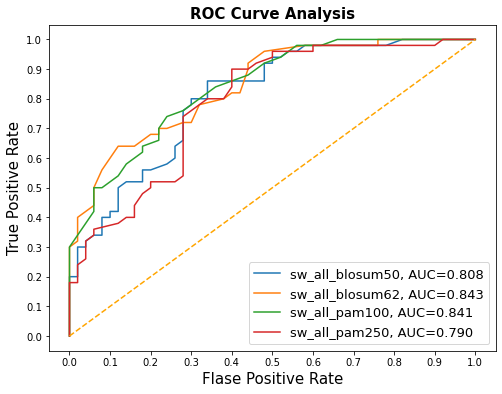

In [86]:
# sw ROC

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [88]:
# First 50 scores are true positive, last 50 are true negative
actual = list(np.repeat(True, 50))  + list(np.repeat(False, 50))
result_table = pd.DataFrame(columns=['score_mat', 'fpr','tpr','auc'])

for k,v in nw_dict.items():  
    fpr, tpr, _ = roc_curve(actual,  v)
    auc = roc_auc_score(actual, v)
    
    result_table = result_table.append({'score_mat':k,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('score_mat', inplace=True)
result_table

,fpr,tpr,auc
score_mat,,,
nw_all_blosum50,"[0.0, 0.0, 0.0, 0.02, 0.02, 0.04, 0.04, 0.06, ...","[0.0, 0.02, 0.12, 0.12, 0.28, 0.3, 0.34, 0.34,...",0.8252
nw_all_blosum62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.04, 0.04, 0....","[0.0, 0.02, 0.18, 0.22, 0.24, 0.24, 0.28, 0.34...",0.7814
nw_all_pam100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.0...","[0.0, 0.02, 0.06, 0.1, 0.26, 0.3, 0.32, 0.34, ...",0.7632
nw_all_pam250,"[0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.02, 0.02, ...","[0.0, 0.02, 0.12, 0.12, 0.14, 0.2, 0.24, 0.28,...",0.8112


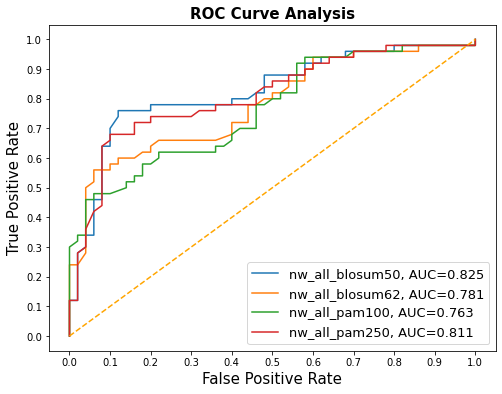

In [90]:
# nw ROC

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [91]:
nw = NeedlemanWunsch("./scoring_matrices/BLOSUM50.mat")
nw.set_gap_open(-3)
nw.set_gap_extend(-1)